In [5]:
# Importing neccesary libraries for Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [6]:
#Loading our dataset to a dataframe format
data=pd.read_csv('train.csv')

In [7]:
# Visualizing our data
data.sample(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q


In [8]:
# Determining our missing values sum
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Replacing our missing age with the mean Age
data['Age']=data['Age'].replace(np.NaN,np.mean(data['Age']))

In [10]:
# Determining our missing values sum
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping unnneccesary columns and missing value

In [11]:
data= data.drop(['Name'], axis=1)  

In [12]:
data= data.drop(['Cabin'], axis=1)

In [13]:
data=data.dropna(subset='Embarked')

In [14]:
data= data.drop(['Ticket'], axis=1)

In [15]:
# Determining our missing values sum
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


Preprocessing our categorical variable by Encoding them using OneHotEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns to be encoded
cat_columns = ['Sex', 'Embarked']

# Create a new dataframe to store the encoded columns
#encoded_data = data.copy()

# Encode each categorical column using LabelEncoder
encoder = LabelEncoder()
for col in cat_columns:
    data[col] = encoder.fit_transform(data[col])

# Verify that the number of rows is the same
#assert data.shape[0] == encoded_data.shape[0]


In [19]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [67]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#encoder = LabelEncoder()

# Select the categorical columns to be encoded
cat_column = data[['Sex','Embarked']]

# Fit and transform the encoder on the categorical column
encoded_cat_column = encoder.fit_transform(cat_column)

# Create a new dataframe with the encoded column
datal= pd.concat([data.drop(['Sex', 'Embarked'], axis=1), pd.DataFrame(encoded_cat_column)], axis=1)


In [21]:
# Our new Encoded data
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [23]:
# Looks like we have some missing values 
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [58]:
# Dropping missing values since they are small and are on the same row
datal.dropna()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
5,6.0,0.0,3.0,30.09129,0.0,0.0,8.4583,0.0,1.0,1.0,0.0,0.0


Splitting our data to dependent and independent Variables

In [24]:
X=data.drop('Survived', axis=1)

In [25]:
X # Our indenpendent Variable

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


In [26]:
y=data['Survived']

In [27]:
y  # Our Dependent variable

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split   # importing library for splitting our test and train 

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [29]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
127,128,3,1,24.000000,0,0,7.1417,2
355,356,3,1,28.000000,0,0,9.5000,2
698,699,1,1,49.000000,1,1,110.8833,0
538,539,3,1,29.699118,0,0,14.5000,2
851,852,3,1,74.000000,0,0,7.7750,2
...,...,...,...,...,...,...,...,...
327,328,2,0,36.000000,0,0,13.0000,2
645,646,1,1,48.000000,1,0,76.7292,0
151,152,1,0,22.000000,1,0,66.6000,2
584,585,3,1,29.699118,0,0,8.7125,0


In [30]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
526,527,2,0,50.0,0,0,10.5000,2
125,126,3,1,12.0,1,0,11.2417,0
142,143,3,0,24.0,1,0,15.8500,2
21,22,2,1,34.0,0,0,13.0000,2
542,543,3,0,11.0,4,2,31.2750,2
...,...,...,...,...,...,...,...,...
401,402,3,1,26.0,0,0,8.0500,2
119,120,3,0,2.0,4,2,31.2750,2
702,703,3,0,18.0,0,1,14.4542,0
207,208,3,1,26.0,0,0,18.7875,0


In [31]:
y_test

127    1
355    0
698    0
538    0
851    0
      ..
327    1
645    1
151    1
584    0
100    0
Name: Survived, Length: 267, dtype: int64

In [32]:
y_train

526    1
125    1
142    1
21     1
542    0
      ..
401    0
119    0
702    0
207    1
869    1
Name: Survived, Length: 622, dtype: int64

# Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression   # Importing our linear model
from sklearn.model_selection import GridSearchCV    # Importing our hyperparameter tuning library


# Setting some parameters for 
param_lrg = {
    'penalty': ['l1', 'l2'], 
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


In [123]:
lrg=LogisticRegression()

In [124]:
grid_lrg = GridSearchCV(estimator=lrg, param_grid=param_lrg, cv=5, scoring='accuracy')
grid_lrg.fit(X_train, y_train)  # Fitting our training data to our model


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [125]:
print(f"Best hyperparameters: {grid_lrg.best_params_}")  # determining our best parameter
print(f"Best score: {grid_lrg.best_score_}")   # Our Best score


Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8933333333333333


In [126]:
best_lrg = LogisticRegression(**grid_lrg.best_params_)    # Using our best parameters to set our new model
best_lrg.fit(X_train, y_train)     # Fit our training dataset to our new model

test_score = best_lrg.score(X_test, y_test)   # Getting our accuracy score
print(f"Test score: {test_score}")


Test score: 0.6666666666666666


## Predicting new values from our Test data set

In [24]:
df=pd.read_csv('test.csv')  # Reading our dataset to a dataframe 

In [25]:
# Doing all the preprocessing steps done for our train dataset
df=df.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Select the categorical columns to be encoded
cat_column = df[['Sex','Embarked']]

# Fit and transform the encoder on the categorical column
encoded_cat_column = encoder.fit_transform(cat_column)

# Create a new dataframe with the encoded column
df= pd.concat([df.drop(['Sex', 'Embarked'], axis=1), pd.DataFrame(encoded_cat_column)], axis=1)


In [27]:
df['Age']=df['Age'].replace(np.NaN, np.mean(df['Age']))

In [28]:
df['Fare']=df['Fare'].replace(np.NaN, np.mean(df['Fare']))

In [29]:
df.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
0              0
1              0
2              0
3              0
4              0
dtype: int64

In [30]:
y_pred=best_lr.predict(df)

In [31]:
predictions_df = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': y_pred})


In [32]:
predictions_df

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [33]:
predictions_df.to_csv('LogisticRegression_prediction.csv', index=False)  # Saving our predicted value as a csv file

# Decision Tree

In [167]:
from sklearn.model_selection import train_test_split   # importing library for splitting our test and train 

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [168]:
from sklearn.tree import DecisionTreeClassifier   # Importing our linear model
from sklearn.model_selection import GridSearchCV    # Importing our hyperparameter tuning library


# Setting some parameters for 
params_dct = {'max_depth': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4],
          'min_samples_split': [2, 3, 4, 5]}


In [169]:
dct=DecisionTreeClassifier()

In [170]:
dct.fit(X_train, y_train)

DecisionTreeClassifier()

In [171]:
y_pred = dct.predict(X_test)

In [173]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7790262172284644


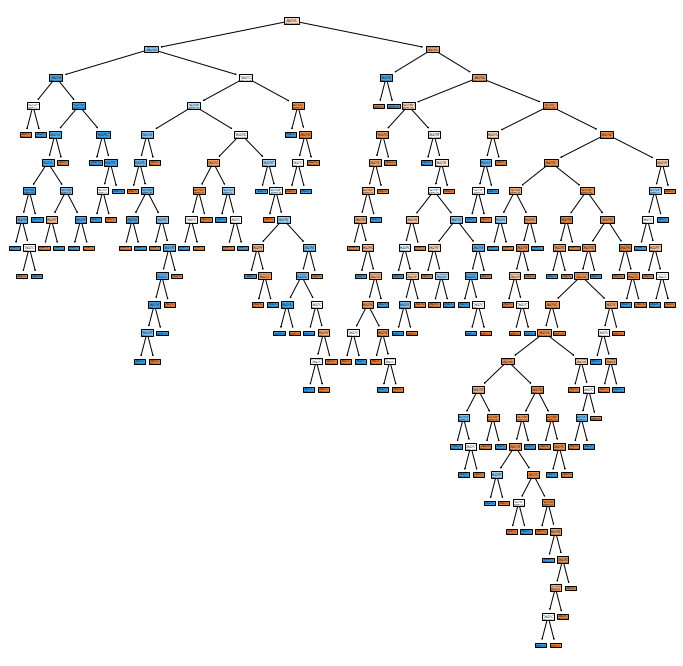

In [174]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dct, filled=True, ax=ax)
plt.show()


In [175]:
grid_dct = GridSearchCV(estimator=dct, param_grid=params_dct, cv=5, scoring='accuracy')
grid_dct.fit(X_train, y_train)  # Fitting our training data to our model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [176]:
print(f"Best hyperparameters: {grid_dct.best_params_}")  # determining our best parameter
print(f"Best score: {grid_dct.best_score_}")   # Our Best score


Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score: 0.8021935483870968


In [177]:
y_pred = grid_dct.best_estimator_.predict(X_test)

In [178]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8277153558052435


# Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [181]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [182]:
y_pred = rfc.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.846441947565543


In [184]:
importances = rfc.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.20220344 0.07805504 0.21941942 0.1828342  0.04138009 0.03646187
 0.20616177 0.03348416]


In [185]:
params_rfc = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [186]:
grid_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='accuracy', n_jobs=-1)

In [187]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [188]:
print("Best hyperparameters:", grid_rfc.best_params_)
print("Best score:", grid_rfc.best_score_)

Best hyperparameters: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8279354838709677


In [190]:
grid_rfc.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [191]:
y_pred = grid_rfc.best_estimator_.predict(X_test)

In [192]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8389513108614233


# Support Vector Machine

In [193]:
from sklearn import svm

In [194]:
svmc = svm.SVC(kernel='linear', C=1, random_state=42)
svmc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [195]:
y_pred = svmc.predict(X_test)

In [196]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8314606741573034


In [134]:
params_svmc = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 1, 0.1, 0.01],
    'degree': [2, 3, 4, 5],
}


In [135]:
from sklearn.model_selection import GridSearchCV
grid_svmc = GridSearchCV(svmc, params_svmc, cv=5, scoring='accuracy', n_jobs=-1)


In [136]:
grid_svmc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [137]:
print("Best hyperparameters:", grid_svmc.best_params_)
print("Best score:", grid_svmc.best_score_)


Best hyperparameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.8933333333333333


In [138]:
y_pred = grid_svmc.best_estimator_.predict(X_test)


In [139]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.75


# K-Nearest Neighbors (KNN)

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knc = KNeighborsClassifier(n_neighbors=25,  weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [56]:
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [57]:
y_pred = knc.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6704119850187266


In [46]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  


In [48]:
# defining parameter range
grid_knc = GridSearchCV(knc, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  


In [50]:
# fitting the model for grid search
grid_search=grid_knc.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [53]:
print(grid_search.best_params_)

{'n_neighbors': 25}


In [54]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 68.18%


In [64]:
# define the hyperparameter space to search over
param_grid = {'n_neighbors': [3, 5, 7, 10,20, 25,30,35,40,45,50],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}


# create a GridSearchCV object
grid_search = GridSearchCV(knc, param_grid=param_grid, cv=5, scoring='accuracy')

In [65]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10, 20, 25, 30, 35, 40, 45,
                                         50],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [66]:
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best mean test score: {grid_search.best_score_:.2f}')

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Best mean test score: 0.68


# Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [104]:
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


In [105]:
nb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [106]:
params = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
}


In [107]:
# define the hyperparameters you want to tune


# create the GridSearchCV object
grid_search = GridSearchCV(nb, params, cv=5)



In [108]:
# fit the model on the training data
grid_search.fit(X_train,y_train)



ValueError: Invalid parameter classifier for estimator GaussianNB(). Check the list of available parameters with `estimator.get_params().keys()`.

In [109]:
# print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Neural Network

In [110]:
from sklearn.neural_network import MLPClassifier

In [111]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [ ]:
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')